In [1]:
#Import all and create a data set

import pandas as pd 
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

genes = ['gene'+ str(i) for i in range(1,101)]
wt=['wt'+str(i) for i in range(1,6)]
ko=['ko'+str(i) for i in range(1,6)]

data = pd.DataFrame(columns=[*wt,*ko], index = genes)

for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    
print(data.head())
print(data.shape)

       wt1   wt2  wt3  wt4  wt5  ko1  ko2  ko3   ko4  ko5
gene1  663   624  647  596  631  970  991  999   983  973
gene2   17    28   25   17   17  659  764  705   678  692
gene3  934  1042  898  954  931  505  490  468   463  509
gene4   78    83   78   66   85  931  956  955   968  922
gene5   82    78   85   91   95  904  963  922  1011  985
(100, 10)


In [2]:
#Center means around 0
#Scale the data so all std dev = 1.
#Transpose so sample in rows rather than columns so we use .T to transpose
scaled_data = preprocessing.scale(data.T)

#This can be used for machine learning as well bu twe only need PCA()
pca=PCA()

#All PCA math in here, loading scores and variation each component accounts for
pca.fit(scaled_data)

#Generate Coords for the graph based on the loading scores and scaled data
pca_data=pca.transform(scaled_data)

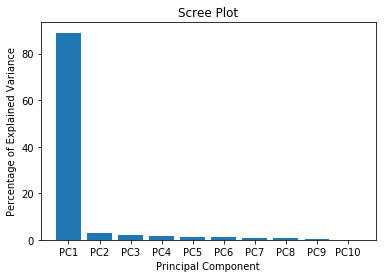

In [3]:
#Scree plot

#Calculate % that each comp accounts for
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

#Create labels
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

#Create matplotlib bar (scree) plot
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

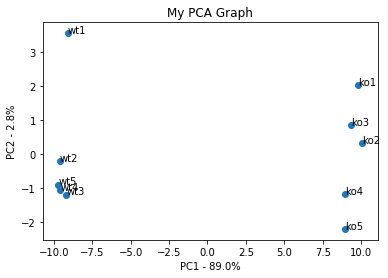

In [4]:

pca_df = pd.DataFrame(pca_data, index = [*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#add sample names to the graph
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    plt.show

In [5]:

#Create pandas "Series" object with loading scores in PC1
#The pca components are a zero index so we start with 0 for pc1
loading_scores = pd.Series(pca.components_[0], index=genes)

#Sort the loading scores based on thier magnitude(absolute value)
sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)

#Here we are just getting the names of the top 10 indexes (which are the gene names)
top_10_genes = sorted_loading_scores[0:10].index.values

#print the top 10 gene names and thier corresponding loading scores
print(loading_scores[top_10_genes])


#This means that a lot of genes played a role in separating the samples (because they are all similar in loading scores)

gene46    0.105969
gene4     0.105879
gene7    -0.105871
gene77   -0.105865
gene71    0.105826
gene29    0.105824
gene17    0.105795
gene11   -0.105777
gene83   -0.105766
gene54   -0.105764
dtype: float64


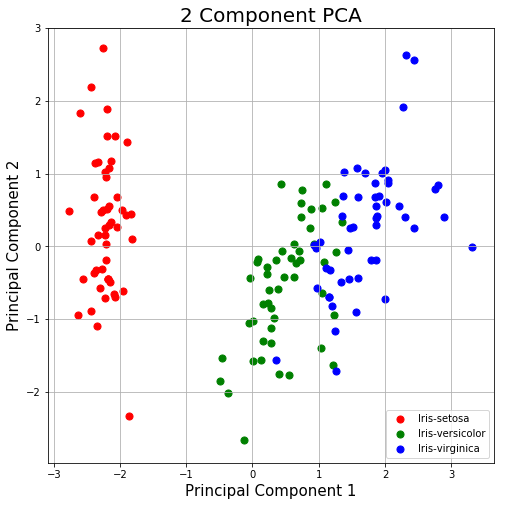

In [6]:

#For scaling data
from sklearn.preprocessing import StandardScaler

%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data,
#especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters,
#let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement
#for the optimal performance of many machine learning algorithms.

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()